# **PRE-PROCESSING**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
dt = pd.read_csv('Land mines.csv')
dt.head()

,voltage,high,soil_type,mine_type
0,0.338157,0.000000,1,1
1,0.320241,0.181818,1,1
2,0.287009,0.272727,1,1
3,0.256284,0.454545,1,1
4,0.262840,0.545455,1,1


In [ ]:
data = dt.drop(['mine_type'], axis=1)
data.head()

,voltage,high,soil_type
0,0.338157,0.000000,1
1,0.320241,0.181818,1
2,0.287009,0.272727,1
3,0.256284,0.454545,1
4,0.262840,0.545455,1


In [ ]:
missingdata = data.isnull().sum()
missingdata

voltage      0
high         0
soil_type    0
dtype: int64

In [ ]:
print(data[data.duplicated(keep=False)])

Empty DataFrame
Columns: [voltage, high, soil_type]
Index: []


In [ ]:
scaler = StandardScaler()
datascale = scaler.fit_transform(data)

scaleddata = pd.DataFrame(datascale, columns = data.columns)
scaleddata.head()

,voltage,high,soil_type
0,-0.472960,-1.665222,-1.464942
1,-0.564586,-1.070248,-1.464942
2,-0.734548,-0.772762,-1.464942
3,-0.891686,-0.177788,-1.464942
4,-0.858157,0.119699,-1.464942


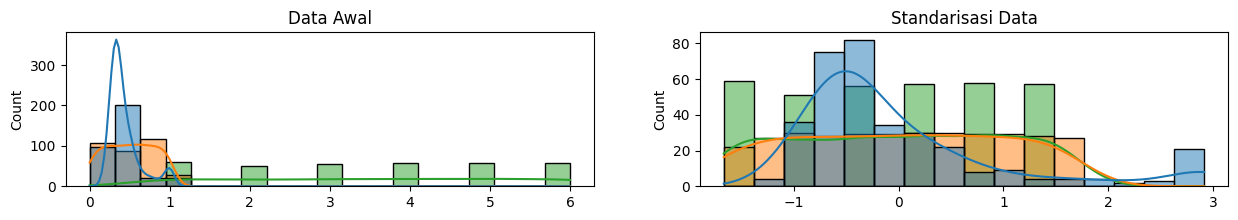

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 2))
sns.histplot(data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Data Awal")
sns.histplot(scaleddata, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Standarisasi Data")
plt.show()

# **DBSCAN**

In [ ]:
nn = NearestNeighbors(n_neighbors=6)
nn = nn.fit(scaleddata)
distances, indices = nn.kneighbors(scaleddata)

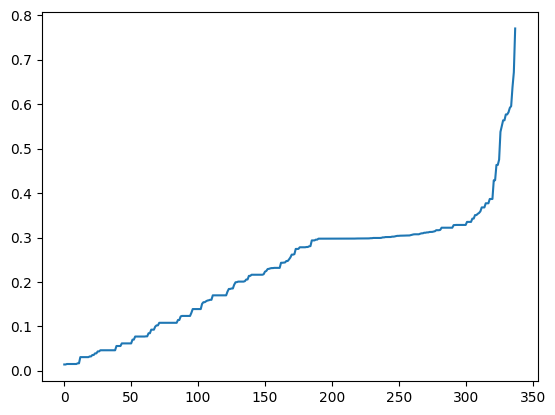

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

In [ ]:
d_cluster = DBSCAN(eps=0.4, min_samples=4)
data['cluster'] = d_cluster.fit_predict(data)
data.head()

,voltage,high,soil_type,cluster
0,0.338157,0.000000,1,0
1,0.320241,0.181818,1,0
2,0.287009,0.272727,1,0
3,0.256284,0.454545,1,0
4,0.262840,0.545455,1,0


In [ ]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(scaleddata)
data['PCA1'] = data_2d[:, 0]
data['PCA2'] = data_2d[:, 1]

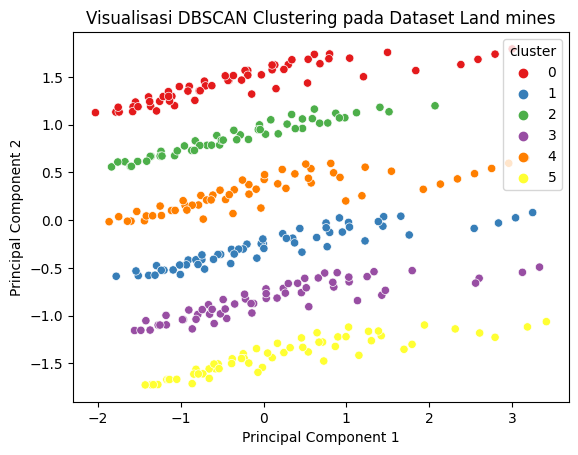

In [ ]:
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=data, palette='Set1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisasi DBSCAN Clustering pada Dataset Land mines')
plt.show()

In [ ]:
slht_scr_dbs = sklearn.metrics.silhouette_score(scaleddata, d_cluster.labels_)
slht_scr_dbs

0.04433728958153634